In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
comm = pd.read_csv('Comm 20k-37.5k.csv')
comm


,CommInsure,Floor,Content,Excess
0,326.49,0,20000,100
1,324.59,0,20000,200
2,322.80,0,20000,300
3,319.27,0,20000,500
4,313.01,0,20000,750
...,...,...,...,...
139,338.97,2,37500,500
140,331.14,2,37500,750
141,323.50,2,37500,1000
142,305.65,2,37500,2000


In [100]:
floor = comm["Floor"]
excess = comm['Excess']


In [27]:
# comm.groupby([floor, excess]).describe()


0         AxesSubplot(0.1,0.15;0.235294x0.75)
1    AxesSubplot(0.382353,0.15;0.235294x0.75)
2    AxesSubplot(0.664706,0.15;0.235294x0.75)
dtype: object

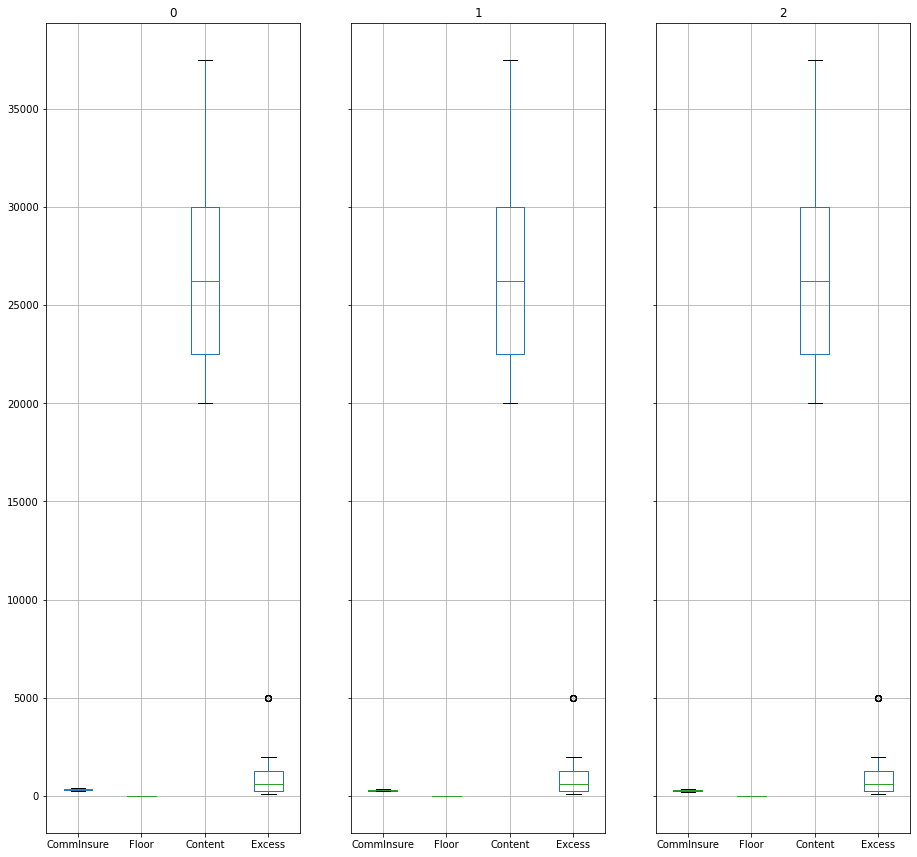

In [101]:
comm.groupby(floor).boxplot(figsize = (15,15), layout = (1,3))

In [102]:
common_comm = comm[comm['Excess'] == 200].append(comm[comm['Excess'] == 750]).append(comm[comm['Excess'] == 1000]).append(comm[comm['Excess'] == 2000]).reset_index()

In [103]:
suncp = pd.read_csv('Suncorp 20k-37.5k.csv')
suncp.dropna()

,Suncorp,Floor,Content,Excess
0,212.66,0.0,20000.0,200.0
1,204.19,0.0,20000.0,400.0
2,197.05,0.0,20000.0,600.0
3,194.34,0.0,20000.0,750.0
4,190.84,0.0,20000.0,1000.0
...,...,...,...,...
103,205.55,2.0,37500.0,400.0
104,196.75,2.0,37500.0,600.0
105,193.39,2.0,37500.0,750.0
106,189.15,2.0,37500.0,1000.0


In [104]:
common_suncp = suncp[suncp['Excess'] == 200].append(suncp[suncp['Excess'] == 750]).append(suncp[suncp['Excess'] == 1000]).append(suncp[suncp['Excess'] == 2000]).reset_index()

for i in range(len(common_suncp)):
    common_suncp['Floor'][i] = int(common_suncp['Floor'][i])

common_suncp.dtypes

<ipython-input-104-6262c57c5485>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_suncp['Floor'][i] = int(common_suncp['Floor'][i])


index        int64
Suncorp    float64
Floor      float64
Content    float64
Excess     float64
dtype: object

In [105]:
merged = pd.merge(common_comm, common_suncp, left_on=['Floor', 'Content', 'Excess'], right_on=['Floor', 'Content', 'Excess'])

In [106]:
common_suncp

,index,Suncorp,Floor,Content,Excess
0,0,212.66,0.0,20000.0,200.0
1,6,164.44,1.0,20000.0,200.0
2,12,155.71,2.0,20000.0,200.0
3,18,231.09,0.0,22500.0,200.0
4,24,176.10,1.0,22500.0,200.0
...,...,...,...,...,...
67,83,166.44,1.0,30000.0,2000.0
68,89,153.59,2.0,30000.0,2000.0
69,95,286.36,0.0,37500.0,2000.0
70,101,190.37,1.0,37500.0,2000.0


In [107]:
merged

,index_x,CommInsure,Floor,Content,Excess,index_y,Suncorp
0,1,324.59,0,20000,200,0,212.66
1,9,280.84,1,20000,200,6,164.44
2,17,274.16,2,20000,200,12,155.71
3,25,339.19,0,22500,200,18,231.09
4,33,292.26,1,22500,200,24,176.10
...,...,...,...,...,...,...,...
67,110,289.49,1,30000,2000,83,166.44
68,118,280.87,2,30000,2000,89,153.59
69,126,381.68,0,37500,2000,95,286.36
70,134,315.74,1,37500,2000,101,190.37


In [108]:
merged = merged.drop(['index_x','index_y'], 1)

In [109]:
option = []
for i in range(len(merged)):
    if merged['CommInsure'][i] < merged['Suncorp'][i]:
        option.append('CommInsure')
    else:
        option.append('Suncorp')

merged['Option'] = option
   

merged

,CommInsure,Floor,Content,Excess,Suncorp,Option
0,324.59,0,20000,200,212.66,Suncorp
1,280.84,1,20000,200,164.44,Suncorp
2,274.16,2,20000,200,155.71,Suncorp
3,339.19,0,22500,200,231.09,Suncorp
4,292.26,1,22500,200,176.10,Suncorp
...,...,...,...,...,...,...
67,289.49,1,30000,2000,166.44,Suncorp
68,280.87,2,30000,2000,153.59,Suncorp
69,381.68,0,37500,2000,286.36,Suncorp
70,315.74,1,37500,2000,190.37,Suncorp


In [110]:
merged.to_csv('merged.csv', index = False)

In [117]:
merged.groupby([floor, excess]).describe()[['CommInsure','Suncorp']]

CommInsure                                                  \
                  count        mean        std     min      25%     50%   
Floor Excess                                                              
0     100           3.0  342.736667  18.917110  324.59  332.935  341.28   
      200           3.0  292.650000  12.615280  280.84  286.005  291.17   
      300           3.0  284.986667  11.641415  274.16  278.830  283.50   
      500           3.0  364.680000  31.225827  339.19  347.265  355.34   
      750           3.0  309.303333  21.588803  292.26  297.165  302.07   
      1000          3.0  300.833333  20.123574  285.07  289.500  293.93   
      2000          3.0  338.616667  40.525664  292.70  323.230  353.76   
      5000          3.0  288.536667  34.590412  248.96  276.310  303.66   
1     100           3.0  280.873333  33.691151  242.27  269.135  296.00   
      200           3.0  360.490000  51.013060  306.03  337.155  368.28   
      300           3.0  305.116667  41.941269  259.11  287.065  315.02   
      500           3.0  296.650000  40.583811  251.93  279.405  306.88   
      750           3.0  336.363333  40.684947  306.93  313.150  319.37   
      1000          3.0  286.270000  34.869487  263.17  266.215  269.26   
      2000          3.0  278.606667  33.995271  256.48  259.035  261.59   
      5000          3.0  358.383333  55.160023  320.81  326.720  332.63   
2     100           3.0  303.010000  45.782526  273.88  276.625  279.37   
      200           3.0  294.543333  44.351930  266.71  268.970  271.23   
      300           3.0  331.200000  16.720440  313.01  323.850  334.69   
      500           3.0  281.113333  10.546347  269.27  276.925  284.58   
      750           3.0  273.456667   9.631746  262.57  269.750  276.93   
      1000          3.0  352.450000  27.480497  327.14  337.835  348.53   
      2000          3.0  297.076667  17.828787  280.22  287.745  295.27   
      5000          3.0  288.603333  16.351224  273.05  280.080  287.11   

                              Suncorp                                          \
                  75%     max   count        mean        std     min      25%   
Floor Excess                                                                    
0     100     351.810  362.34     3.0  232.623333  22.105466  212.66  220.745   
      200     298.555  305.94     3.0  170.476667   8.708745  164.44  165.485   
      300     290.400  297.30     3.0  159.626667   6.801194  155.69  155.700   
      500     377.425  399.51     3.0  259.230000  37.529006  231.09  237.925   
      750     317.825  333.58     3.0  185.703333  17.033386  175.64  175.870   
      1000    308.715  323.50     3.0  173.046667  14.005893  163.70  164.995   
      2000    361.575  369.39     3.0  229.203333  44.263396  178.55  213.585   
      5000    308.325  312.99     3.0  167.050000  32.255057  129.83  157.155   
1     100     300.175  304.35     3.0  156.213333  30.352505  121.26  146.360   
      200     387.720  407.16     3.0  255.586667  56.031596  195.40  230.260   
      300     328.120  341.22     3.0  182.056667  37.004996  140.01  168.250   
      500     319.010  331.14     3.0  169.416667  34.099018  130.38  157.430   
      750     351.080  382.79     3.0  227.910000  47.416239  190.84  201.195   
      1000    297.820  326.38     3.0  165.790000  34.879523  142.08  145.765   
      2000    289.670  317.75     3.0  154.973333  32.814881  133.43  136.090   
      5000    377.170  421.71     3.0  254.613333  64.745734  208.32  217.620   
2     100     317.575  355.78     3.0  181.100000  44.530521  152.81  155.435   
      200     308.460  345.69     3.0  168.480000  41.236541  143.09  144.690   
      300     340.295  345.90     3.0  220.476667  24.187179  194.34  209.680   
      500     287.035  289.49     3.0  158.246667  11.133932  145.57  154.150   
      750     278.900  280.87     3.0  147.470000   9.191893  136.90  144.410   
      1000    365.105  381.68     3.0  246.

0         AxesSubplot(0.1,0.15;0.235294x0.75)
1    AxesSubplot(0.382353,0.15;0.235294x0.75)
2    AxesSubplot(0.664706,0.15;0.235294x0.75)
dtype: object

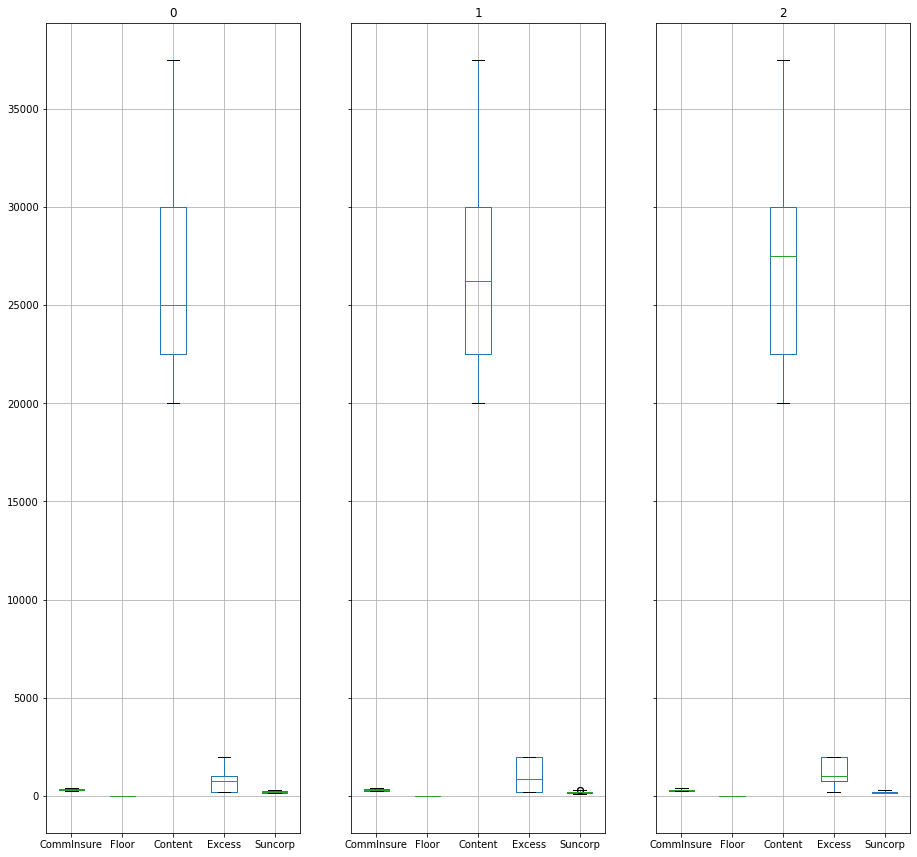

In [112]:
merged.groupby(floor).boxplot(figsize = (15,15), layout = (1,3))

In [121]:
merged['Excess']

0      200
1      200
2      200
3      200
4      200
      ... 
67    2000
68    2000
69    2000
70    2000
71    2000
Name: Excess, Length: 72, dtype: int64

In [120]:
merged.groupby([floor, excess]).describe()[['CommInsure','Suncorp']]

CommInsure                                                  \
                  count        mean        std     min      25%     50%   
Floor Excess                                                              
0     100           3.0  342.736667  18.917110  324.59  332.935  341.28   
      200           3.0  292.650000  12.615280  280.84  286.005  291.17   
      300           3.0  284.986667  11.641415  274.16  278.830  283.50   
      500           3.0  364.680000  31.225827  339.19  347.265  355.34   
      750           3.0  309.303333  21.588803  292.26  297.165  302.07   
      1000          3.0  300.833333  20.123574  285.07  289.500  293.93   
      2000          3.0  338.616667  40.525664  292.70  323.230  353.76   
      5000          3.0  288.536667  34.590412  248.96  276.310  303.66   
1     100           3.0  280.873333  33.691151  242.27  269.135  296.00   
      200           3.0  360.490000  51.013060  306.03  337.155  368.28   
      300           3.0  305.116667  41.941269  259.11  287.065  315.02   
      500           3.0  296.650000  40.583811  251.93  279.405  306.88   
      750           3.0  336.363333  40.684947  306.93  313.150  319.37   
      1000          3.0  286.270000  34.869487  263.17  266.215  269.26   
      2000          3.0  278.606667  33.995271  256.48  259.035  261.59   
      5000          3.0  358.383333  55.160023  320.81  326.720  332.63   
2     100           3.0  303.010000  45.782526  273.88  276.625  279.37   
      200           3.0  294.543333  44.351930  266.71  268.970  271.23   
      300           3.0  331.200000  16.720440  313.01  323.850  334.69   
      500           3.0  281.113333  10.546347  269.27  276.925  284.58   
      750           3.0  273.456667   9.631746  262.57  269.750  276.93   
      1000          3.0  352.450000  27.480497  327.14  337.835  348.53   
      2000          3.0  297.076667  17.828787  280.22  287.745  295.27   
      5000          3.0  288.603333  16.351224  273.05  280.080  287.11   

                              Suncorp                                          \
                  75%     max   count        mean        std     min      25%   
Floor Excess                                                                    
0     100     351.810  362.34     3.0  232.623333  22.105466  212.66  220.745   
      200     298.555  305.94     3.0  170.476667   8.708745  164.44  165.485   
      300     290.400  297.30     3.0  159.626667   6.801194  155.69  155.700   
      500     377.425  399.51     3.0  259.230000  37.529006  231.09  237.925   
      750     317.825  333.58     3.0  185.703333  17.033386  175.64  175.870   
      1000    308.715  323.50     3.0  173.046667  14.005893  163.70  164.995   
      2000    361.575  369.39     3.0  229.203333  44.263396  178.55  213.585   
      5000    308.325  312.99     3.0  167.050000  32.255057  129.83  157.155   
1     100     300.175  304.35     3.0  156.213333  30.352505  121.26  146.360   
      200     387.720  407.16     3.0  255.586667  56.031596  195.40  230.260   
      300     328.120  341.22     3.0  182.056667  37.004996  140.01  168.250   
      500     319.010  331.14     3.0  169.416667  34.099018  130.38  157.430   
      750     351.080  382.79     3.0  227.910000  47.416239  190.84  201.195   
      1000    297.820  326.38     3.0  165.790000  34.879523  142.08  145.765   
      2000    289.670  317.75     3.0  154.973333  32.814881  133.43  136.090   
      5000    377.170  421.71     3.0  254.613333  64.745734  208.32  217.620   
2     100     317.575  355.78     3.0  181.100000  44.530521  152.81  155.435   
      200     308.460  345.69     3.0  168.480000  41.236541  143.09  144.690   
      300     340.295  345.90     3.0  220.476667  24.187179  194.34  209.680   
      500     287.035  289.49     3.0  158.246667  11.133932  145.57  154.150   
      750     278.900  280.87     3.0  147.470000   9.191893  136.90  144.410   
      1000    365.105  381.68     3.0  246.

<AxesSubplot:xlabel='Floor', ylabel='value'>

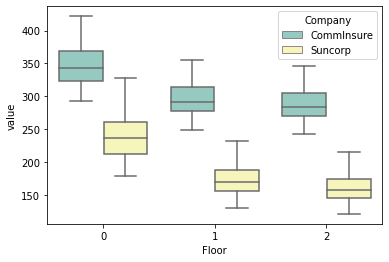

In [116]:
merged_boxplot=pd.melt(merged,id_vars=['Floor'],value_vars=['CommInsure','Suncorp'],var_name='Company')
sns.boxplot(x='Floor',y='value',data=merged_boxplot,hue='Company',palette="Set3")